In [35]:
import os
import sys 
from pathlib import Path
from datetime import datetime as dt
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def speech_to_text():
    os.system("python2.7 /home/saad/kaldi-gstreamer-server/kaldigstserver/client.py /home/saad/16KhzARY.wav > output.txt ")
    with open('output.txt', 'r') as file:
            data = file.read().replace('\n', '')
    return data

In [28]:
def entity_recognition(phrase):
    with open('/home/saad/S2T_NER_TEXT/NER/model.pkl', 'rb') as f:
            clf = pickle.load(f)
    with open('/home/saad/S2T_NER_TEXT/NER/vectorizer.pkl', 'rb') as f1:
        vectorizer = pickle.load(f1)


    with open('/home/saad/S2T_NER_TEXT/NER/tfidf.pkl', 'rb') as f1:
        tfidf = pickle.load(f1)

    arr = phrase.split()

    y=[]
    token=[]
    for x in arr:
        x=[x]
        test_str = vectorizer.transform(x)
        test_tfstr = tfidf.transform(test_str)
        test_tfstr.shape
        token.append(x)
        y.append(clf.predict(test_tfstr.toarray())[0])
        
        
    df=pd.DataFrame(list(zip(token,y)),columns=['token','entity_type'])
    df['token'] = df['token'].str[0]

    #for i in
    df.to_csv("Entities.tsv", sep='\t')
    print (df)
    count = df['entity_type'].value_counts() 
    print(count) 
    return df

In [3]:
#def headline_classification(phrase):
with open('/home/saad/S2T_NER_TEXT/headline_classification/model.pkl', 'rb') as f:
    clf = pickle.load(f)
with open('/home/saad/S2T_NER_TEXT/headline_classification/vectorizer.pkl', 'rb') as f1:
    vectorizer = pickle.load(f1)


with open('/home/saad/S2T_NER_TEXT/headline_classification/tfidf.pkl', 'rb') as f1:
    tfidf = pickle.load(f1)



In [4]:
from urduhack.tokenization import sentence_tokenizer
with open('output.txt', 'r') as file:
            text = file.read().replace('\n', '')
        
arr = sentence_tokenizer(text)        

In [5]:
arr

['تاہم بعض کہ کون کرنے میں بعد میں باتوں پر جان نے ثابت کر دے گا۔',
 'اس میں خان میں دہشت گردی کی بڑی کوشش ناکام بنادی آئی ایس پی آر کے مطابق کام کے قریب کافی اچھا پر کارروائی کی گئی آپریشن میں دو انتہائی مطلوب دہشت گرد مارے گئے دہشت گردوں. کی فائرنگ سے کرنل مجیب الرحمن نے جام شہادت نوش کیا آپریشن کے دوران بڑی تعداد میں اسلحہ اور مواصلاتی آلات تحویل میں لے لیے گئے ہیں۔',
 'کی قیمتوں پر سعودی عرب اور روس میں تجارتی جنگ کا خدشہ ہو گئے اور روس میں تیل کی. پیداوار سے متعلق معاہدہ نہ ہو سکا اور میں منڈی میں تیل کی قیمتوں میں ایک دن میں کاری کی سب سے بڑی کمی خام تیل انتیس فیصد سے زائد سستا ہوگیا سعودی عرب میں اسے آئی اور یورپی منڈیوں کے لیتے کسی ستر تک کر دیا اور تیل کی قیمت میں کمی درآمدی مالک کے لیے فائدہ مند ہے۔',
 'معاشی ماہرین. کے مطابق پاکستان کے درآمدی بل میں نمایاں کمی متوقع ہے۔',
 'پاکستان کو سالانہ پانچ ارب ڈالر تک کی بچت ہو سکتی ہے. ہے. عالمی منڈی میں خام تیل کی قیمت میں کمی کے بعد ایشیائی ریاست بہار میں مندی پاکستان اسٹاک مارکیٹ لڑکھڑانے کے بعد سنبھل گئی سات سو سے زائد پولیس کے ک

In [23]:
y=[]
sentence=[]
for x in arr:
    x=[x]
    test_str = vectorizer.transform(x)
    test_tfstr = tfidf.transform(test_str)
    test_tfstr.shape
    sentence.append(x)
    y.append(clf.predict(test_tfstr.toarray())[0])
df1=pd.DataFrame(list(zip(sentence,y)),columns=['sentence','category'])
#df1.to_csv("Output.tsv", sep='\t')
print (df1)

                                             sentence      category
0   [تاہم بعض کہ کون کرنے میں بعد میں باتوں پر جان...  بین الاقوامی
1   [اس میں خان میں دہشت گردی کی بڑی کوشش ناکام بن...  بین الاقوامی
2   [کی قیمتوں پر سعودی عرب اور روس میں تجارتی جنگ...  بین الاقوامی
3   [معاشی ماہرین. کے مطابق پاکستان کے درآمدی بل م...          قومی
4   [پاکستان کو سالانہ پانچ ارب ڈالر تک کی بچت ہو ...          قومی
5   [گلبہار کراچی میں جام حادثات افراد کے مارے نما...        حادثات
6   [عمارت گرنے سے ستائیس افراد جاں بحق ہوئے عمارت...          قومی
7   [چاروں صوبائی کرکے قتل کیا گیا مقتولین کی شناخ...          قومی
8                [واقعہ ذاتی دشمنی کا نتیجہ لگتا ہے۔]  بین الاقوامی
9   [وزیراعلی نے وعدہ کر ہوتے تھے یا کسی بھی اس رپ...          قومی
10      [کو صفر کے کریں کیلئے استعمال کیا جا رہا ہے۔]          قومی
11  [کا ایک ہی طریقہ ہے کہ لوگوں کو بدنام کیا جائے...          قومی


In [24]:
#text = speech_to_text()

In [49]:
#print (type(df1.loc[0, 'sentence']))

df1['sentence'] = df1['sentence'].str[0]

In [50]:
df1.to_csv("headline_output.tsv", sep='\t')

In [30]:
with open('output.txt', 'r') as file:
            data = file.read().replace('\n', '')

df2 = entity_recognition(data)

     token entity_type
0     تاہم       Other
1      بعض       Other
2       کہ       Other
3      کون       Other
4     کرنے       Other
..     ...         ...
478     پر       Other
479     تک       Other
480  ملتوی       Other
481   کردی       Other
482    ہے.       Other

[483 rows x 2 columns]
Other           458
Location         17
Person            7
Organization      1
Name: entity_type, dtype: int64


In [34]:
#number of rows
count_row = df2.shape[0]  
print (count_row)

483


In [37]:
df_stat

Other           458
Location         17
Person            7
Organization      1
Name: entity_type, dtype: int64

In [42]:
df_stat = pd.DataFrame(df_stat,columns=['token','frequency'])

In [45]:
df_stat = (df2['entity_type'].value_counts())

In [46]:
df_stat

Other           458
Location         17
Person            7
Organization      1
Name: entity_type, dtype: int64

Text(0.5, 0, 'entity')

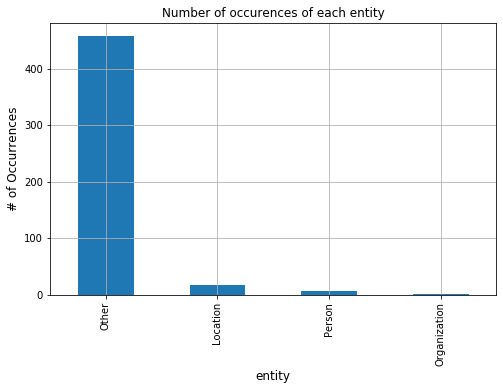

In [54]:
df_stat.plot(x='entity', y='frequency', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of occurences of each entity")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('entity', fontsize=12)

In [52]:
df1_stat = (df1['category'].value_counts())

In [53]:
df1_stat

قومی            7
بین الاقوامی    4
حادثات          1
Name: category, dtype: int64

Text(0.5, 0, 'Category')

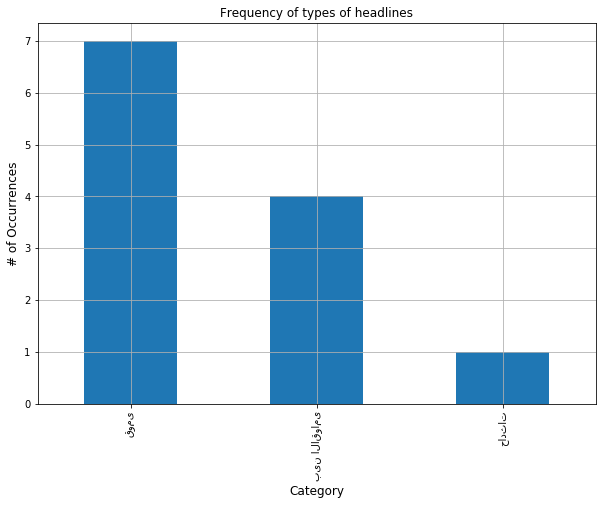

In [56]:
df1_stat.plot(x='Category', y='frequency', kind='bar', legend=False, grid=True, figsize=(10, 7))
plt.title("Frequency of types of headlines")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)